<a href="https://colab.research.google.com/github/jrDhiraj/machineLearning/blob/main/pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import kagglehub
path = kagglehub.dataset_download("yashpalthakor/fmnist-small-csv")

Using Colab cache for faster access to the 'fmnist-small-csv' dataset.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [19]:
import os

# List contents of the downloaded directory to find the CSV file
dataset_files = os.listdir(path)
csv_file = [f for f in dataset_files if f.endswith('.csv')][0]

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, csv_file)

df = pd.read_csv(csv_file_path)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [20]:
df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
5995,1,0,0,0,0,0,0,0,0,0,...,69,12,0,0,0,0,0,0,0,0
5996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,8,0,0,0,0,0,0,0,0,0,...,39,47,2,0,0,29,0,0,0,0
5998,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5999,8,0,0,0,0,0,0,0,0,0,...,139,177,0,0,0,0,0,0,0,0


In [21]:
df.shape

(6000, 785)

` Dependencies `

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [23]:
torch.manual_seed(42)

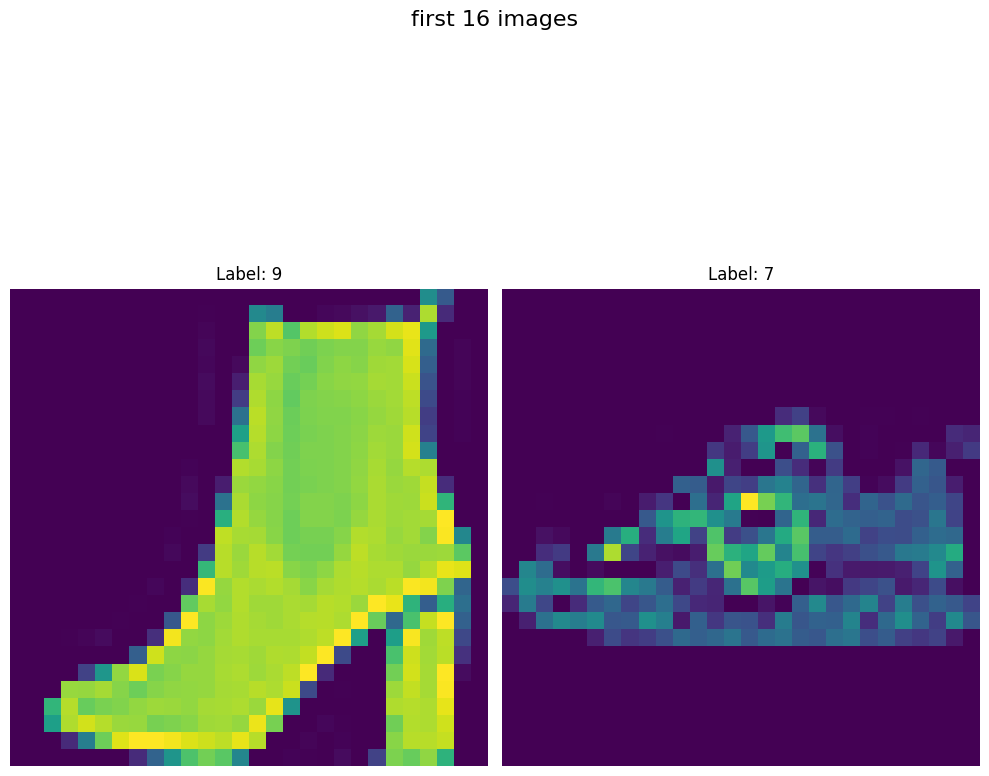

In [24]:
fig , ax = plt.subplots(1,2,figsize=(10,10))
fig.suptitle("first 16 images", fontsize =16 )

for i, ax in enumerate(ax.flat):
  img = df.iloc[i, 1: ].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f'Label: {df.iloc[i,0]}')

plt.tight_layout(rect = [0,0,1,0.96])
plt.show()

In [25]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train = X_train / 255.0     #Scaling
X_test = X_test / 255.0

In [28]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  # Length of the dataset
  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [32]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [33]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset,  batch_size=32, shuffle=False)


In [36]:
class MYNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
        )

  def forward(self, x):
    return self.model(x)



In [37]:
epochs = 100
lr = 0.1

In [38]:
model = MYNN(X_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)


In [39]:
for epoch in range(epochs):
  totOL_loss_epoch = 0.0
  for batch_feature, batch_labels in train_loader:

    outputs = model(batch_feature)

    loss = criterion(outputs , batch_labels)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    totOL_loss_epoch += loss.item()

  loss = totOL_loss_epoch / len(train_loader)

print(f'epoch: {epoch +1 }, loss : {loss}')

epoch: 100, loss : 0.008310633393703028


In [40]:
model.eval()

MYNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [42]:
# Accuracy =

total = 0
correct = 0
with torch.no_grad():
  for batch_feature, batch_labels in test_loader:

    outputs = model(batch_feature)
    _, predicted = torch.max(outputs.data, 1)

    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}')



Accuracy: 83.25
